In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "../../Data/Q6/Bank_Customer.csv"

data = pd.read_csv(file_path)
if data.isna().any().any():
    data.dropna(inplace=True, axis=0)

# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDateOfBirth      1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB
None


In [3]:
data

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2018/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2018/9/16,184706,1000.0


In [5]:
data.loc[:, "CustGender"].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [6]:
data[data.loc[:, "CustGender"] == "T"].index

Int64Index([959987], dtype='int64')

In [8]:
data.drop(index=data[data.loc[:, "CustGender"] == "T"].index, inplace=True)

In [2]:
data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


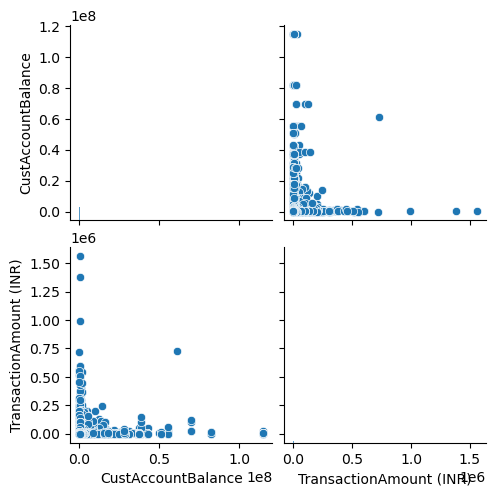

In [4]:
# Visualize distribution of numerical variables
numeric_columns = ['CustAccountBalance', 'TransactionAmount (INR)']

# Pairplot to observe relationships between numerical variables
sns.pairplot(data[numeric_columns])
plt.show()

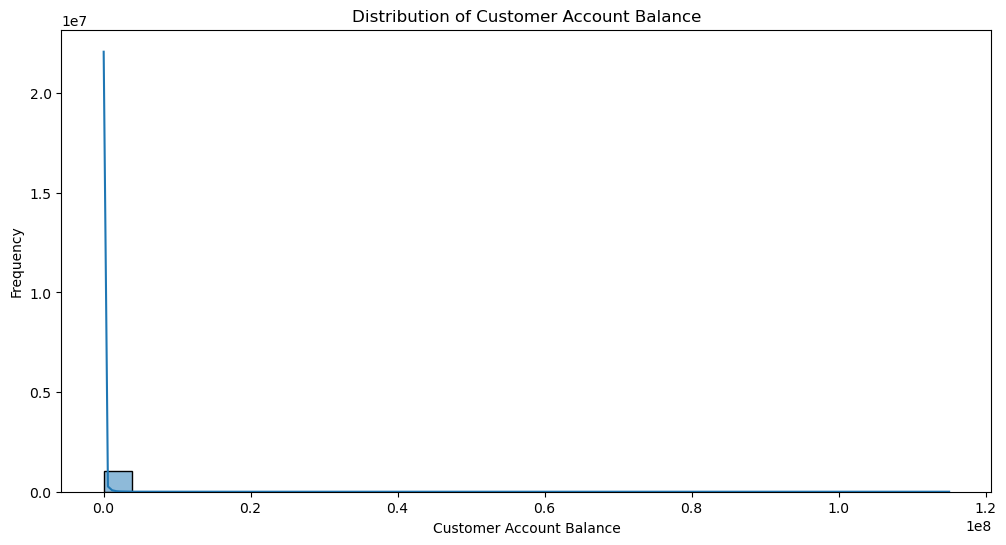

In [5]:
# Visualize the distribution of Account Balance
plt.figure(figsize=(12, 6))
sns.histplot(data['CustAccountBalance'], bins=30, kde=True)
plt.title('Distribution of Customer Account Balance')
plt.xlabel('Customer Account Balance')
plt.ylabel('Frequency')
plt.show()

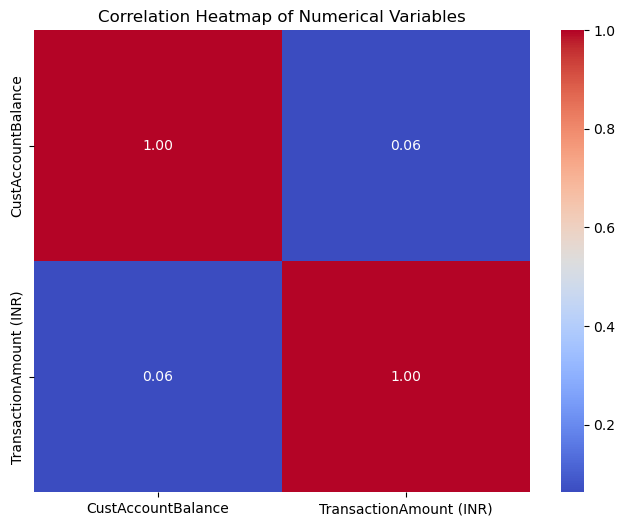

In [11]:
# Visualize correlation heatmap of numerical variables
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19632\578443121.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


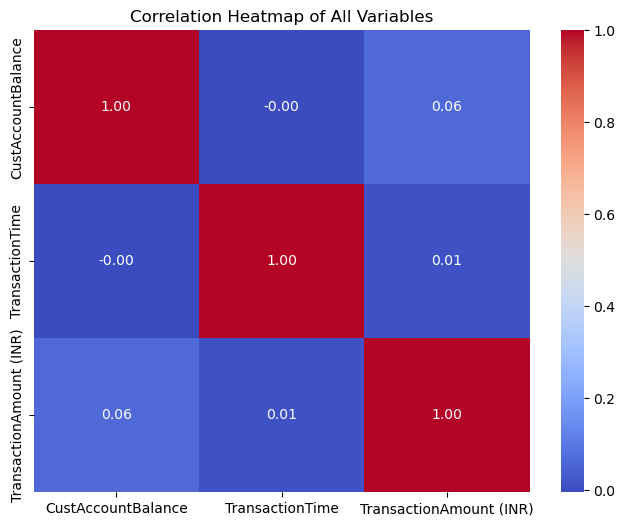

In [12]:
# Visualize correlation heatmap of numerical variables
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Numerical Variables')
plt.show()

### Transaction trends over time

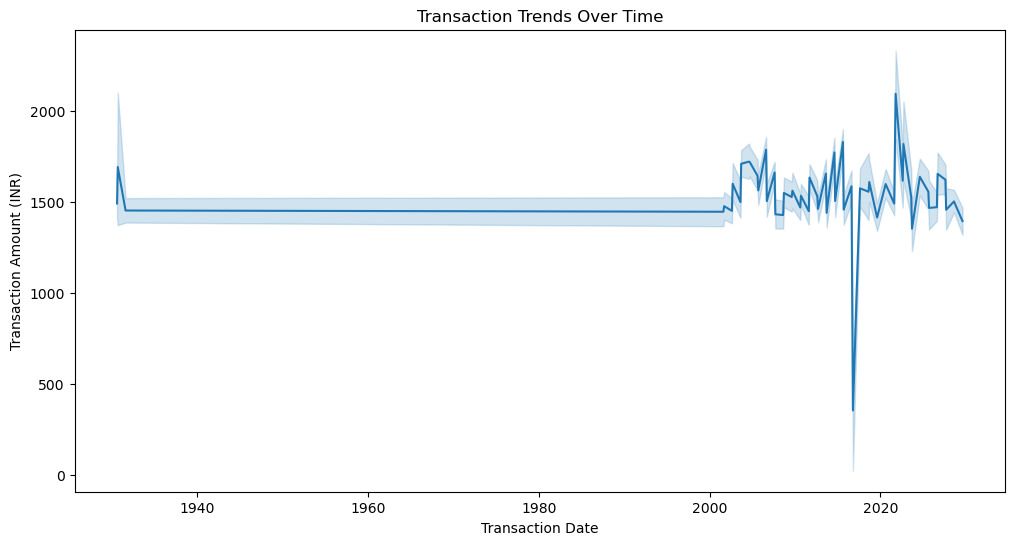

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Plot transaction trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionDate', y='TransactionAmount (INR)', data=data)
plt.title('Transaction Trends Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount (INR)')
plt.show()


### Customer Demographics:

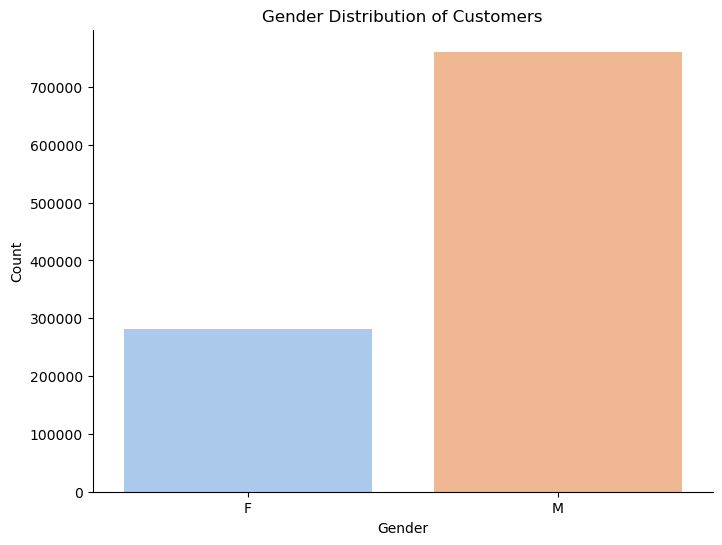

In [15]:
# Explore the distribution of customers by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='CustGender', data=data, palette='pastel')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.despine()
plt.show()

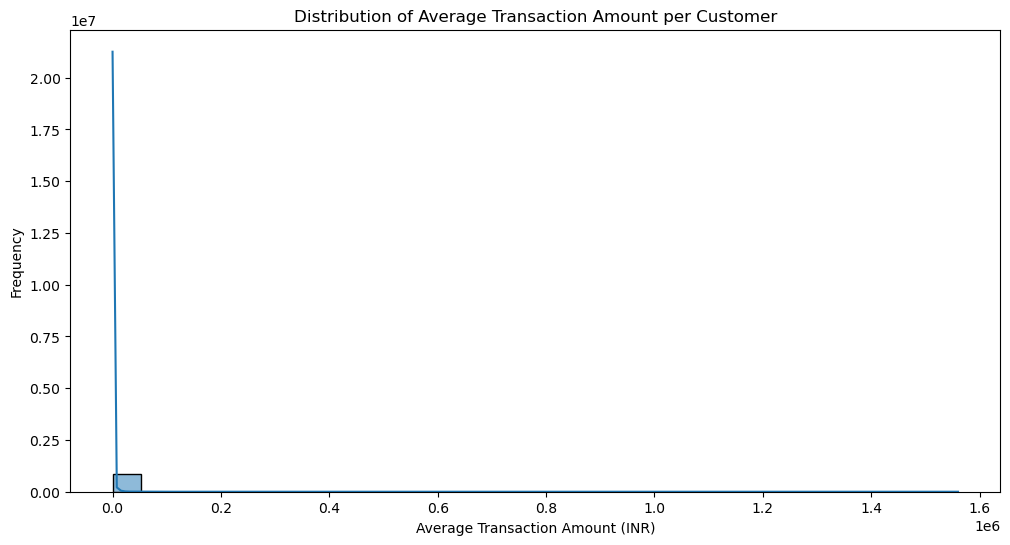

In [18]:
# Calculate and visualize average transaction amount
avg_transaction_amount = data.groupby('CustomerID')['TransactionAmount (INR)'].mean()

plt.figure(figsize=(12, 6))
sns.histplot(avg_transaction_amount, bins=30, kde=True)
plt.title('Distribution of Average Transaction Amount per Customer')
plt.xlabel('Average Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()


### Customer Loyalty

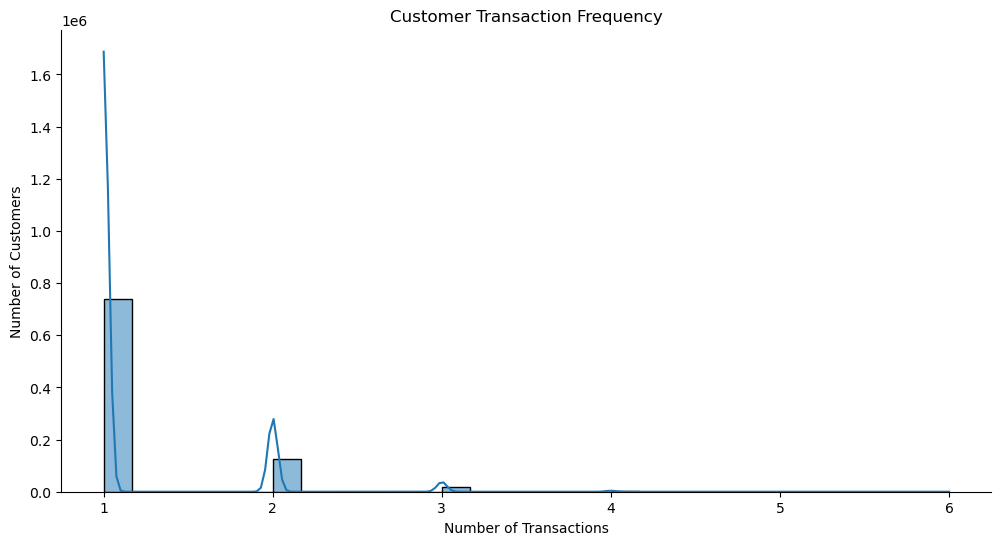

In [19]:
# Analyze the frequency of transactions for each customer
customer_transaction_counts = data['CustomerID'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(customer_transaction_counts, bins=30, kde=True)
plt.title('Customer Transaction Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
sns.despine()
plt.show()

### Geographic Sales Analysis:

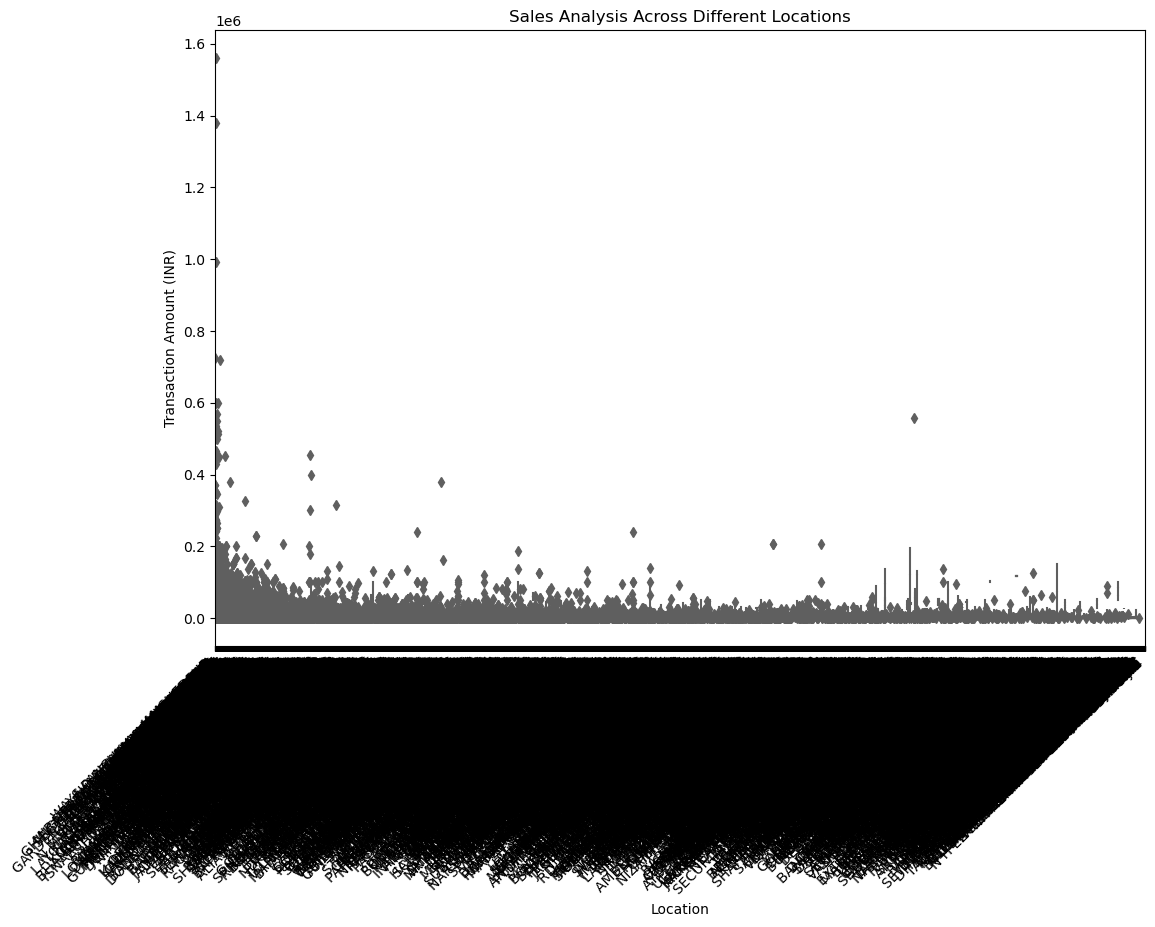

In [23]:
# Explore sales patterns across different locations
plt.figure(figsize=(12, 8))
sns.boxplot(x='CustLocation', y='TransactionAmount (INR)', data=data, palette='Set3')
plt.title('Sales Analysis Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Transaction Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.show()